In [409]:
import pandas as pd 
import numpy as np 
import os
import pathlib
import plotly.express as px
import plotly.graph_objects as po
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from matplotlib import rcParams
from optbinning import OptimalBinning

In [410]:
dictionary=pd.read_excel("D:\Customer churn problems\Data Dictionary.xls")
dictionary

,Variable Name,Description,Type
0,SeriousDlqin2yrs,Person experienced 90 days past due delinquenc...,Y/N
1,RevolvingUtilizationOfUnsecuredLines,Total balance on credit cards and personal lin...,percentage
2,age,Age of borrower in years,integer
3,NumberOfTime30-59DaysPastDueNotWorse,Number of times borrower has been 30-59 days p...,integer
4,DebtRatio,"Monthly debt payments, alimony,living costs di...",percentage
5,MonthlyIncome,Monthly income,real
6,NumberOfOpenCreditLinesAndLoans,Number of Open loans (installment like car loa...,integer
7,NumberOfTimes90DaysLate,Number of times borrower has been 90 days or m...,integer
8,NumberRealEstateLoansOrLines,Number of mortgage and real estate loans inclu...,integer
9,NumberOfTime60-89DaysPastDueNotWorse,Number of times borrower has been 60-89 days p...,integer


In [411]:
#importing data
df_train=pd.read_csv("D:\Customer churn problems\cs-training.csv")
df_sample= pd.read_csv("D:\Customer churn problems\sampleEntry.csv")
df_train

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


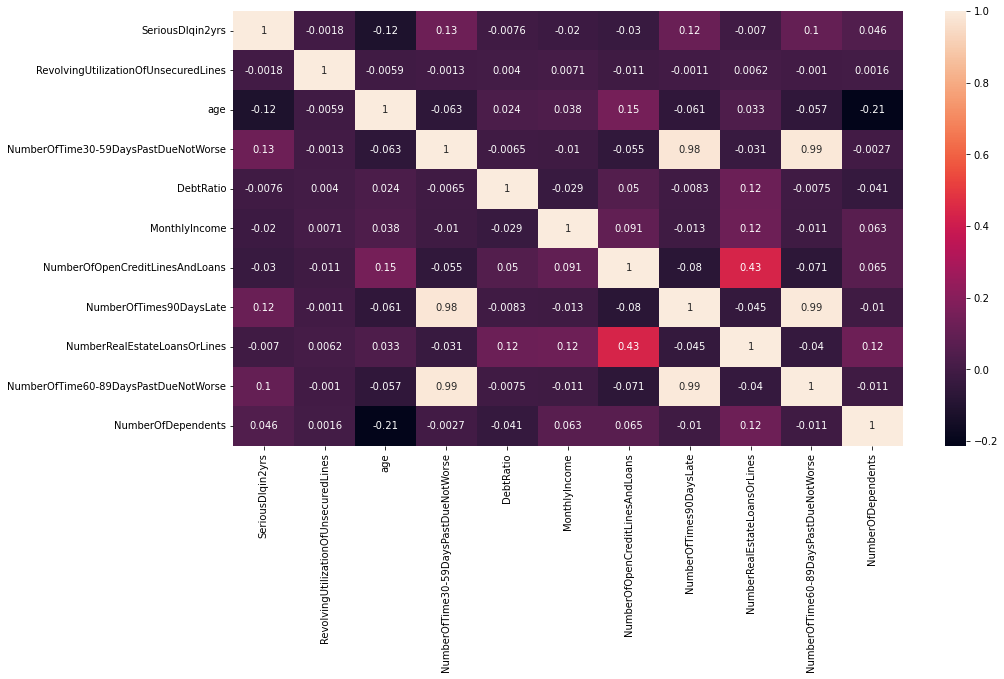

In [412]:
plt.figure(figsize=(15,8))
sns.heatmap(df_train.corr(),annot=True)
plt.show()

In [413]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

In [414]:
df_train[['RevolvingUtilizationOfUnsecuredLines','age','MonthlyIncome','NumberOfTimes90DaysLate']].describe()

,RevolvingUtilizationOfUnsecuredLines,age,MonthlyIncome,NumberOfTimes90DaysLate
count,150000.000000,150000.000000,1.202690e+05,150000.000000
mean,6.048438,52.295207,6.670221e+03,0.265973
std,249.755371,14.771866,1.438467e+04,4.169304
min,0.000000,0.000000,0.000000e+00,0.000000
25%,0.029867,41.000000,3.400000e+03,0.000000
50%,0.154181,52.000000,5.400000e+03,0.000000
75%,0.559046,63.000000,8.249000e+03,0.000000
max,50708.000000,109.000000,3.008750e+06,98.000000


Notable discovery:
- The number of defaulted customer equals 6% of the sample
- How could age possibly indicate that babies and 109 years old customers borrowing loan??(age min =0, max=109)
- The monthly income seems to have some outliers. There are millionairs who earn millions a month and there are people who have no income at all.
-Revolving ultilization(e.g: credit card ultilization, or debt to credit card limit ratio) should be between 0 to 1 but in this dataset, the mean is 6.
- Can a person defaulted 98 times in 2 years??  

xem qua tat ca cac yeu to dac biet

In [415]:
df_train[df_train['RevolvingUtilizationOfUnsecuredLines']>1]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
162,1,1.046279,47,1,1.104301,5416.0,6,0,2,0,1.0
191,0,1.095083,53,5,0.536704,3500.0,7,1,1,2,0.0
226,1,1.953488,38,0,0.153500,3556.0,5,0,0,0,2.0
251,1,1.048211,58,7,0.151957,3500.0,12,0,0,0,0.0
293,0,2340.000000,45,0,0.339333,8333.0,7,0,2,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
149939,0,1.049900,26,0,0.073220,6500.0,6,0,0,1,0.0
149955,1,1.135552,41,2,0.845887,7500.0,12,0,4,1,0.0
149962,0,1.005733,48,0,0.248896,2944.0,4,3,0,0,1.0
149964,0,1.010934,63,0,0.608211,6015.0,8,0,1,0,0.0


In [416]:
for col in df_train.columns:
    print(col, ':',len(df_train[col].value_counts()))

SeriousDlqin2yrs : 2
RevolvingUtilizationOfUnsecuredLines : 125728
age : 86
NumberOfTime30-59DaysPastDueNotWorse : 16
DebtRatio : 114194
MonthlyIncome : 13594
NumberOfOpenCreditLinesAndLoans : 58
NumberOfTimes90DaysLate : 19
NumberRealEstateLoansOrLines : 28
NumberOfTime60-89DaysPastDueNotWorse : 13
NumberOfDependents : 13


In [417]:
num_f=['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans','NumberOfDependents','NumberRealEstateLoansOrLines','NumberOfTime30-59DaysPastDueNotWorse']
cat_f=['SeriousDlqin2yrs']

c:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

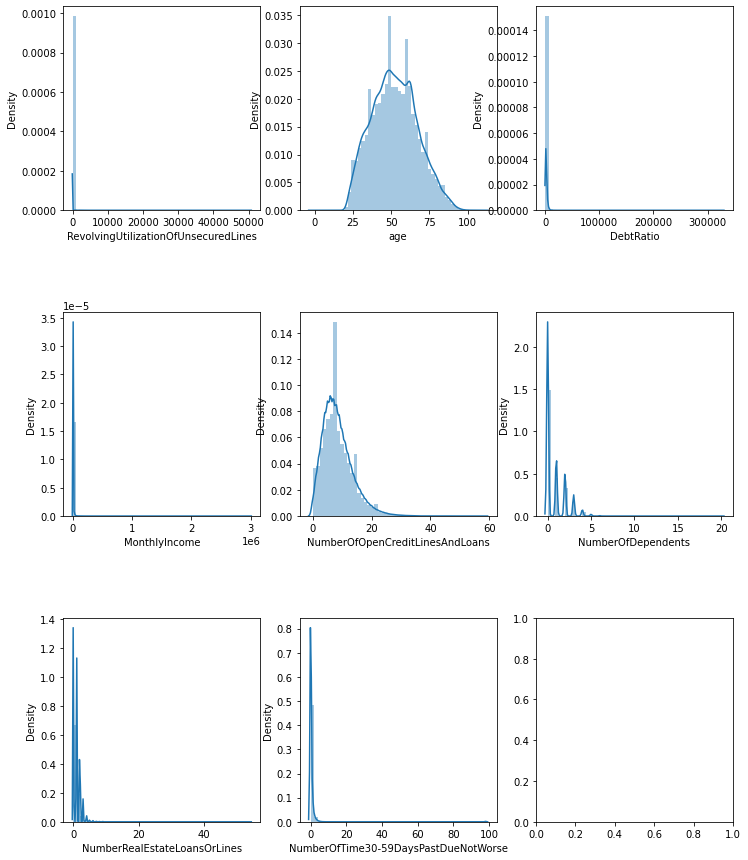

In [418]:
fig,axes=plt.subplots(3,3,figsize=(12,15))
for index, col in enumerate(num_f):
    x,y=index//3, index%3
    sns.distplot(df_train[col],ax=axes[x,y])
plt.subplots_adjust(hspace=0.5)

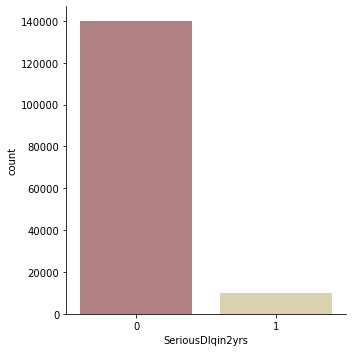

In [419]:
sns.catplot(x='SeriousDlqin2yrs', kind='count', label='SeriousDlqin2yrs',palette='pink', data=df_train)
plt.subplots_adjust(hspace=0.5)

In [420]:
def plot_distributions_int64(feature):
    _, axes= plt.subplots(1,2,figsize=(12,4))
    sns.histplot(df_train[feature],kde=True,label='train',stat='density',discrete=True,color='pink',alpha=0.6,ax=axes[0])
    axes[0].legend()
    axes[0].set_title('Distribution')
    sns.boxplot(x='SeriousDlqin2yrs',y=feature,data=df_train,ax=axes[1],palette=['Seagreen','tan'])
    X=df_train[[feature]].dropna()
    plt.suptitle('{} distrbutions'.format(feature),y=1.15)

In [421]:
def plot_distributions_float(feature):
    _, axes= plt.subplots(1,2,figsize=(12,4))
    sns.kdeplot(df_train[feature].apply(np.log1p),label='Train',color='pink',alpha=0.5, shade=True,edgecolor='k',ax=axes[0])
    axes[0].legend()
    axes[0].set_title('Distribution')
    axes[0].set_xlabel('{}'.format(feature))
    sns.boxplot(x='SeriousDlqin2yrs',y=df_train[feature],data=df_train,ax=axes[1],palette=['seagreen','tan'])
    X=df_train[[feature]].dropna()
    plt.suptitle('{} distrbutions'.format(feature),y=1.15)

AGE

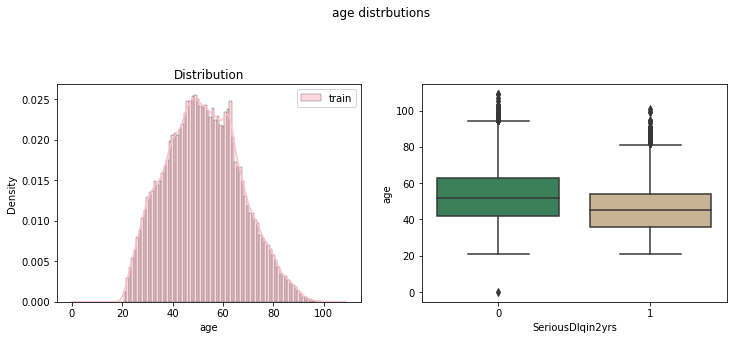

In [422]:
plot_distributions_int64('age')

In [423]:
#Bin group:
condition_age=[(df_train['age']>=0)&(df_train['age']<=30),
               (df_train['age']>30)&(df_train['age']<=37),
               (df_train['age']>37)&(df_train['age']<=44),
               (df_train['age']>44)&(df_train['age']<=48),
               (df_train['age']>48)&(df_train['age']<=50),
               (df_train['age']>50)&(df_train['age']<=56),
               (df_train['age']>56)&(df_train['age']<=60),
               (df_train['age']>60)&(df_train['age']<=63),
               (df_train['age']>63)&(df_train['age']<=68),
               (df_train['age']>68)&(df_train['age']<=75),
               (df_train['age']>75)]
value_age=['21-30','30-37','37-44','44-48','48-50','50-56','56-60','60-63','63-68','68-75','>75']
df_train['age_group']=np.select(condition_age,value_age)
#Count frequency
age_1=df_train[['age_group','SeriousDlqin2yrs']]
total_age_bin=age_1.groupby(by=['age_group'],as_index=False).agg('count')
age_default=age_1.groupby(by=['age_group'],as_index=False).agg('sum')
age_default_ratio=total_age_bin.merge(age_default,how='outer',on='age_group')
age_default_ratio.columns=['age_group','Total','Default']
age_default_ratio['default_rate']=age_default_ratio.eval('Default/Total*100')
age_default_ratio['non_default_rate']=age_default_ratio.eval('((Total-Default)/Total)*100')
age_default_ratio

,age_group,Total,Default,default_rate,non_default_rate
0,21-30,10758,1244,11.563488,88.436512
1,30-37,15628,1611,10.308421,89.691579
2,37-44,21417,1880,8.778073,91.221927
3,44-48,14741,1200,8.140560,91.859440
4,48-50,7590,592,7.799736,92.200264
5,50-56,21450,1485,6.923077,93.076923
6,56-60,13356,664,4.971548,95.028452
7,60-63,10809,474,4.385235,95.614765
8,63-68,12884,391,3.034772,96.965228
9,68-75,11238,278,2.473750,97.526250


<AxesSubplot:xlabel='age_group', ylabel='default_rate'>

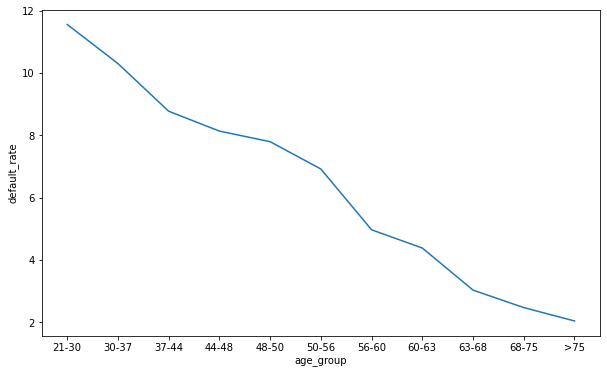

In [424]:
rcParams['figure.figsize']=10,6
sns.lineplot(data=age_default_ratio,x='age_group',y='default_rate')



It is obvious that age is an important factor deciding customers' decision to dafault. The younger the customer the higher the default rate. age_group and age are negatively correlated.

(0.0, 2.0)

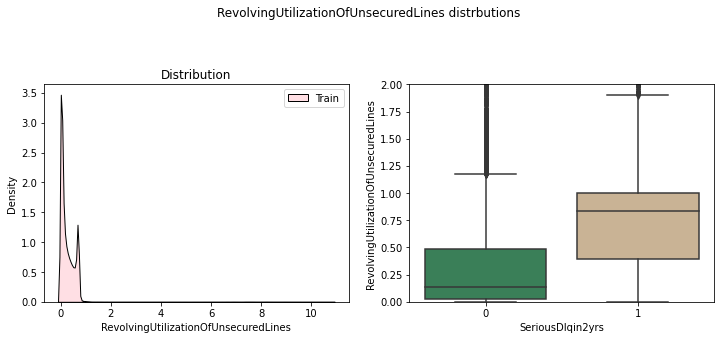

In [425]:
plot_distributions_float('RevolvingUtilizationOfUnsecuredLines')
plt.gca().set_ylim(0, 2)

In [426]:
df_train.RevolvingUtilizationOfUnsecuredLines.describe()

count    150000.000000
mean          6.048438
std         249.755371
min           0.000000
25%           0.029867
50%           0.154181
75%           0.559046
max       50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

In [427]:
x=df_train['RevolvingUtilizationOfUnsecuredLines'].values
y=df_train['SeriousDlqin2yrs']
otpb3=OptimalBinning(name='Revolving Utilization', dtype='numerical',solver='cp') 
otpb3.fit(x,y)
revolv=otpb3.binning_table.build()
revolv_bin=revolv[['Bin', 'Count','Non-event','Event','Event rate']]
revolv_bin.loc[0:8]

,Bin,Count,Non-event,Event,Event rate
0,"(-inf, 0.06)",52081,51173,908,0.017434
1,"[0.06, 0.13)",18962,18560,402,0.021200
2,"[0.13, 0.22)",12911,12509,402,0.031136
3,"[0.22, 0.30)",9027,8676,351,0.038883
4,"[0.30, 0.39)",7769,7364,405,0.052130
5,"[0.39, 0.49)",7611,7122,489,0.064249
6,"[0.49, 0.70)",11599,10499,1100,0.094836
7,"[0.70, 0.90)",10172,8662,1510,0.148447
8,"[0.90, inf)",19868,15409,4459,0.224431


<AxesSubplot:xlabel='Bin', ylabel='Event rate'>

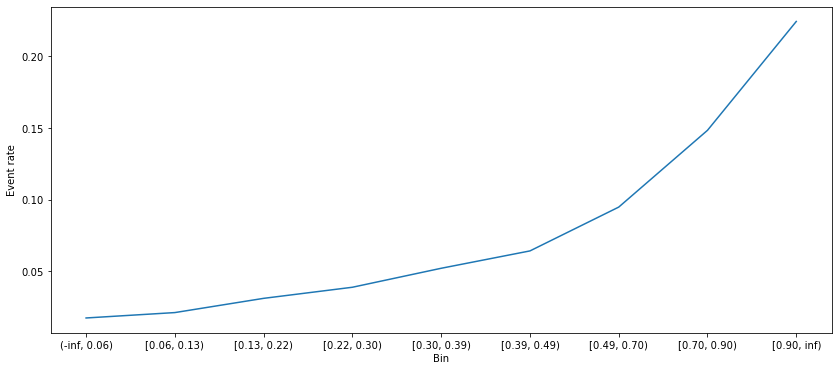

In [428]:
rcParams['figure.figsize']=14,6
sns.lineplot(data=revolv_bin.loc[0:8],x='Bin',y='Event rate')

For revolving utilization, The default rate is positively correlated with the indicator: it increases along the increase in this ratio. It can be as important as age in determining the outcome of this model. 

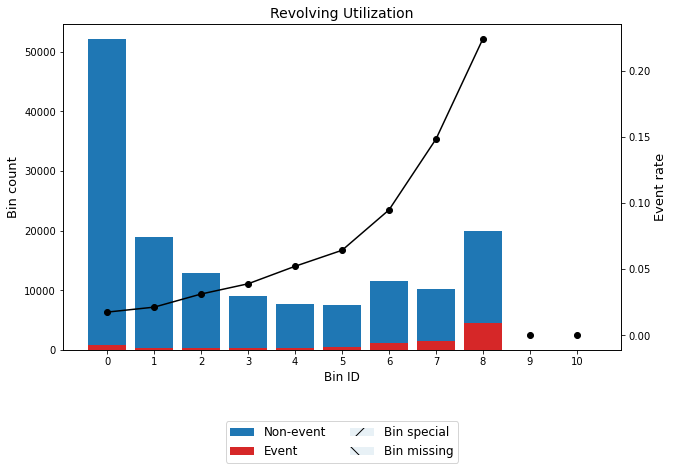

In [429]:
rcParams['figure.figsize']=10,6
otpb3.binning_table.plot(metric='event_rate')

DEBT RATIO

(0.0, 2.0)

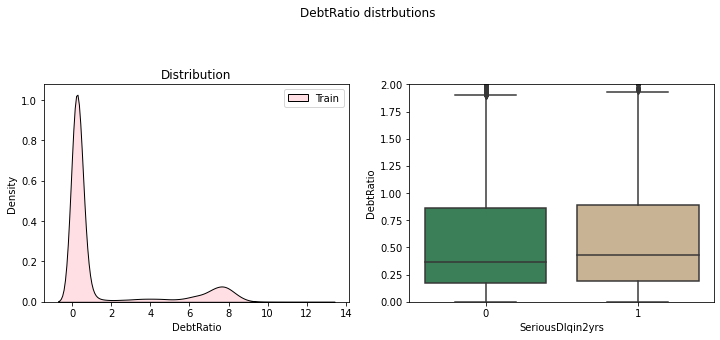

In [430]:
plot_distributions_float('DebtRatio')
plt.gca().set_ylim(0, 2)

In [431]:
df_train.DebtRatio.describe()

count    150000.000000
mean        353.005076
std        2037.818523
min           0.000000
25%           0.175074
50%           0.366508
75%           0.868254
max      329664.000000
Name: DebtRatio, dtype: float64

In [432]:
df_train[df_train['DebtRatio']>3489][['SeriousDlqin2yrs','MonthlyIncome']].describe()

,SeriousDlqin2yrs,MonthlyIncome
count,3750.000000,185.000000
mean,0.064267,0.064865
std,0.245260,0.246956
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


In [433]:
print('Missing income for debt greater than 1: ',df_train[df_train['DebtRatio']>1]['MonthlyIncome'].isnull().mean())
print('Percentage of missing income that have a debt > 1:', (df_train[df_train['DebtRatio']>1]['MonthlyIncome'].isnull().sum()/df_train['MonthlyIncome'].isnull().sum()))

Missing income for debt greater than 1:  0.7941486182656459
Percentage of missing income that have a debt > 1: 0.9385489892704585


In [434]:
x= df_train['DebtRatio'].values
y=df_train['SeriousDlqin2yrs']
optb1=OptimalBinning(name='DebtRatio',dtype='numerical',solver='cp')
optb1.fit(x,y)
debt=optb1.binning_table.build()
debt_bin=debt[['Bin','Count','Non-event','Event','Event rate']]
debt_bin

,Bin,Count,Non-event,Event,Event rate
0,"(-inf, 0.02)",13043,12384,659,0.050525
1,"[0.02, 0.35)",58248,54765,3483,0.059796
2,"[0.35, 0.42)",12807,11996,811,0.063325
3,"[0.42, 0.51)",10183,9444,739,0.072572
4,"[0.51, 0.65)",10998,10009,989,0.089925
5,"[0.65, 3.97)",14652,12965,1687,0.115138
6,"[3.97, 995.50)",13144,12316,828,0.062995
7,"[995.50, inf)",16925,16095,830,0.049040
8,Special,0,0,0,0.000000
9,Missing,0,0,0,0.000000


<AxesSubplot:xlabel='Bin', ylabel='Event rate'>

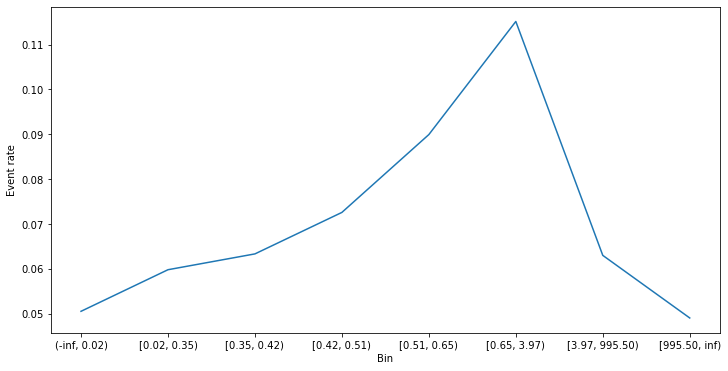

In [435]:
rcParams['figure.figsize']=12,6
sns.lineplot(data=debt_bin[0:8],x='Bin',y='Event rate')

Monthly Income

(0.0, 10000.0)

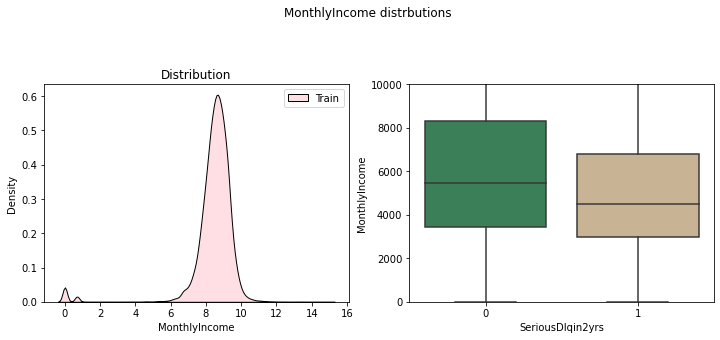

In [436]:
plot_distributions_float('MonthlyIncome')
plt.gca().set_ylim(0,10000)

In [437]:
df_train.MonthlyIncome.describe()

count    1.202690e+05
mean     6.670221e+03
std      1.438467e+04
min      0.000000e+00
25%      3.400000e+03
50%      5.400000e+03
75%      8.249000e+03
max      3.008750e+06
Name: MonthlyIncome, dtype: float64

In [438]:
x=df_train['MonthlyIncome'].values
y=df_train['SeriousDlqin2yrs']
optb4=OptimalBinning(name='MonthlyIncome',dtype='numerical',solver='cp')
optb4.fit(x,y)
income=optb4.binning_table.build()
income_bin=income[['Bin','Count','Non-event','Event','Event rate']]
income_bin

,Bin,Count,Non-event,Event,Event rate
0,"(-inf, 1508.50)",7640,7080,560,0.073298
1,"[1508.50, 2569.50)",10929,9879,1050,0.096075
2,"[2569.50, 3459.50)",12232,11006,1226,0.100229
3,"[3459.50, 4831.50)",20911,19191,1720,0.082253
4,"[4831.50, 5320.50)",7611,7068,543,0.071344
5,"[5320.50, 6643.50)",16128,15050,1078,0.066840
6,"[6643.50, 7656.50)",9903,9353,550,0.055539
7,"[7656.50, 9945.50)",14975,14207,768,0.051285
8,"[9945.50, inf)",19940,19078,862,0.043230
9,Special,0,0,0,0.000000


<AxesSubplot:xlabel='Bin', ylabel='Event rate'>

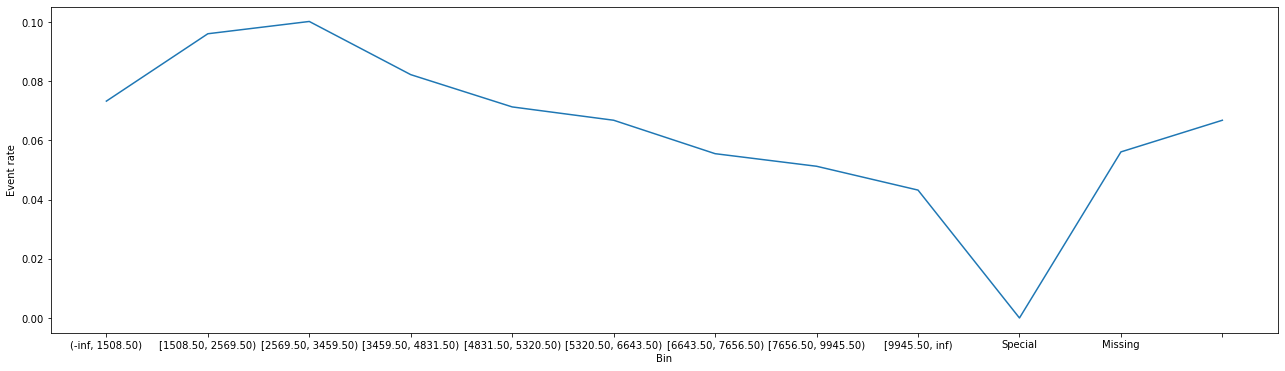

In [439]:
rcParams['figure.figsize']=22,6
sns.lineplot(data=income_bin,x='Bin',y='Event rate')


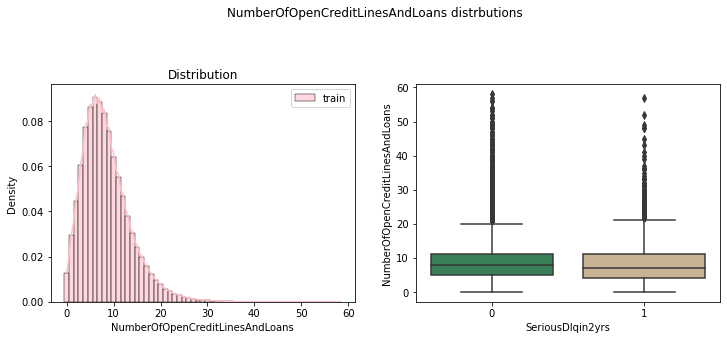

In [440]:
plot_distributions_int64('NumberOfOpenCreditLinesAndLoans') #dùng log transformation cho skewed data 

In [441]:
df_train['NumberOfOpenCreditLinesAndLoans'].describe()


count    150000.000000
mean          8.452760
std           5.145951
min           0.000000
25%           5.000000
50%           8.000000
75%          11.000000
max          58.000000
Name: NumberOfOpenCreditLinesAndLoans, dtype: float64

In [442]:
x=df_train['NumberOfOpenCreditLinesAndLoans'].values
y=df_train['SeriousDlqin2yrs']
optb2=OptimalBinning(name='DebtRatio',dtype='numerical',solver='cp')
optb2.fit(x,y)
noloans=optb2.binning_table.build()
noloans_bin=noloans[['Bin','Count','Non-event','Event','Event rate']]
noloans_bin

,Bin,Count,Non-event,Event,Event rate
0,"(-inf, 2.50)",12992,11314,1678,0.129156
1,"[2.50, 3.50)",9058,8376,682,0.075293
2,"[3.50, 4.50)",11609,10866,743,0.064002
3,"[4.50, 5.50)",12931,12112,819,0.063336
4,"[5.50, 7.50)",26859,25358,1501,0.055884
5,"[7.50, 8.50)",12562,11956,606,0.048241
6,"[8.50, 11.50)",29300,27591,1709,0.058328
7,"[11.50, 13.50)",12672,11921,751,0.059265
8,"[13.50, inf)",22017,20480,1537,0.069810
9,Special,0,0,0,0.000000


<AxesSubplot:xlabel='Bin', ylabel='Event rate'>

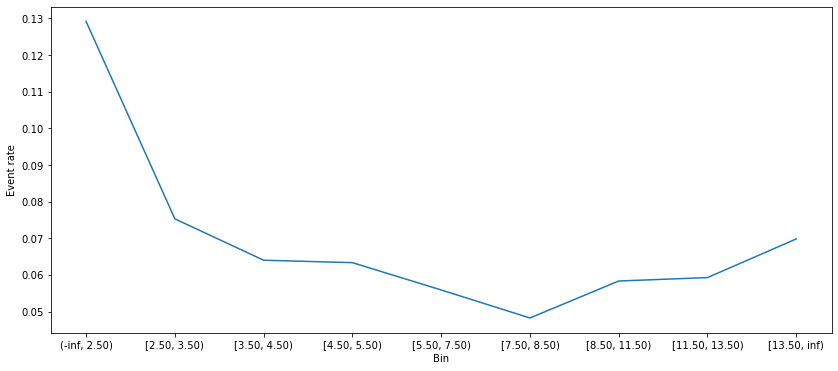

In [443]:
rcParams['figure.figsize']=14,6
sns.lineplot(data=noloans_bin.loc[0:8],x='Bin',y='Event rate')

Kind of useless information

Number of real estate loans

(-1.0, 10.0)

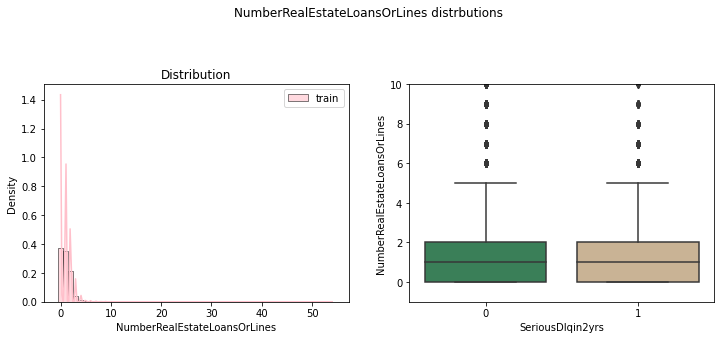

In [444]:
plot_distributions_int64('NumberRealEstateLoansOrLines')
plt.gca().set_ylim(-1, 10)

(-1.0, 10.0)

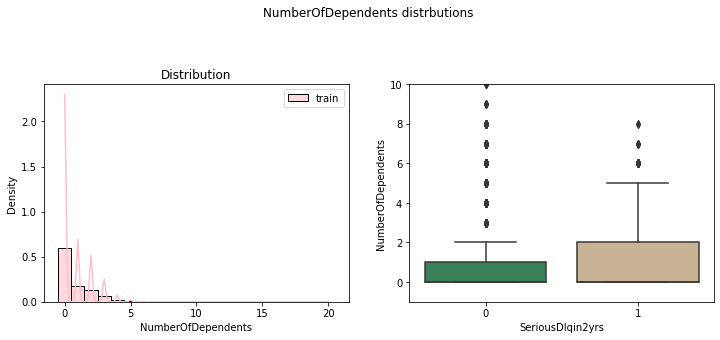

In [445]:
plot_distributions_int64('NumberOfDependents')
plt.gca().set_ylim(-1, 10)

In [446]:
x=df_train['NumberOfDependents'].values
y=df_train['SeriousDlqin2yrs']
optb6=OptimalBinning(name='DebtRatio',dtype='numerical',solver='cp')
optb6.fit(x,y)
depend=optb6.binning_table.build()
depend_bin=depend[['Bin','Count','Non-event','Event','Event rate']]
depend_bin

,Bin,Count,Non-event,Event,Event rate
0,"(-inf, 0.50)",86902,81807,5095,0.058629
1,"[0.50, 1.50)",26316,24381,1935,0.073529
2,"[1.50, 2.50)",19522,17938,1584,0.081139
3,"[2.50, inf)",13336,12103,1233,0.092457
4,Special,0,0,0,0.000000
5,Missing,3924,3745,179,0.045617
Totals,,150000,139974,10026,0.066840


<AxesSubplot:xlabel='Bin', ylabel='Event rate'>

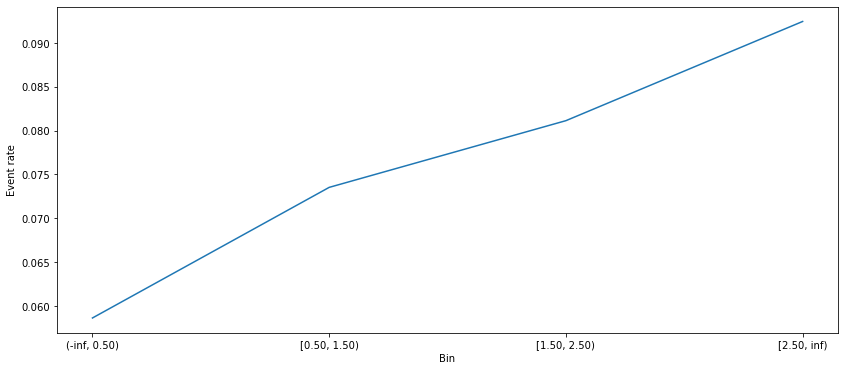

In [447]:
rcParams['figure.figsize']=14,6
sns.lineplot(data=depend_bin.loc[0:3],x='Bin',y='Event rate')  

In [448]:
df_train.groupby(by='NumberOfTimes90DaysLate').NumberOfTimes90DaysLate.count()

NumberOfTimes90DaysLate
0     141662
1       5243
2       1555
3        667
4        291
5        131
6         80
7         38
8         21
9         19
10         8
11         5
12         2
13         4
14         2
15         2
17         1
96         5
98       264
Name: NumberOfTimes90DaysLate, dtype: int64

In the past 2 years, 264 people default 98 times, and no one defaults >17 and <96 times

In [449]:
df_train[df_train['NumberOfTimes90DaysLate']>95][['SeriousDlqin2yrs','NumberOfTime60-89DaysPastDueNotWorse','NumberOfTime30-59DaysPastDueNotWorse','NumberOfTimes90DaysLate']].describe()

,SeriousDlqin2yrs,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate
count,269.000000,269.000000,269.000000,269.000000
mean,0.546468,97.962825,97.962825,97.962825
std,0.498764,0.270628,0.270628,0.270628
min,0.000000,96.000000,96.000000,96.000000
25%,0.000000,98.000000,98.000000,98.000000
50%,1.000000,98.000000,98.000000,98.000000
75%,1.000000,98.000000,98.000000,98.000000
max,1.000000,98.000000,98.000000,98.000000


It makes sense when people keeps defaulted, but they are defaulted at a massive rate( more than 50%).

Text(0.5, 0.98, 'The three "Daypast" count feature')

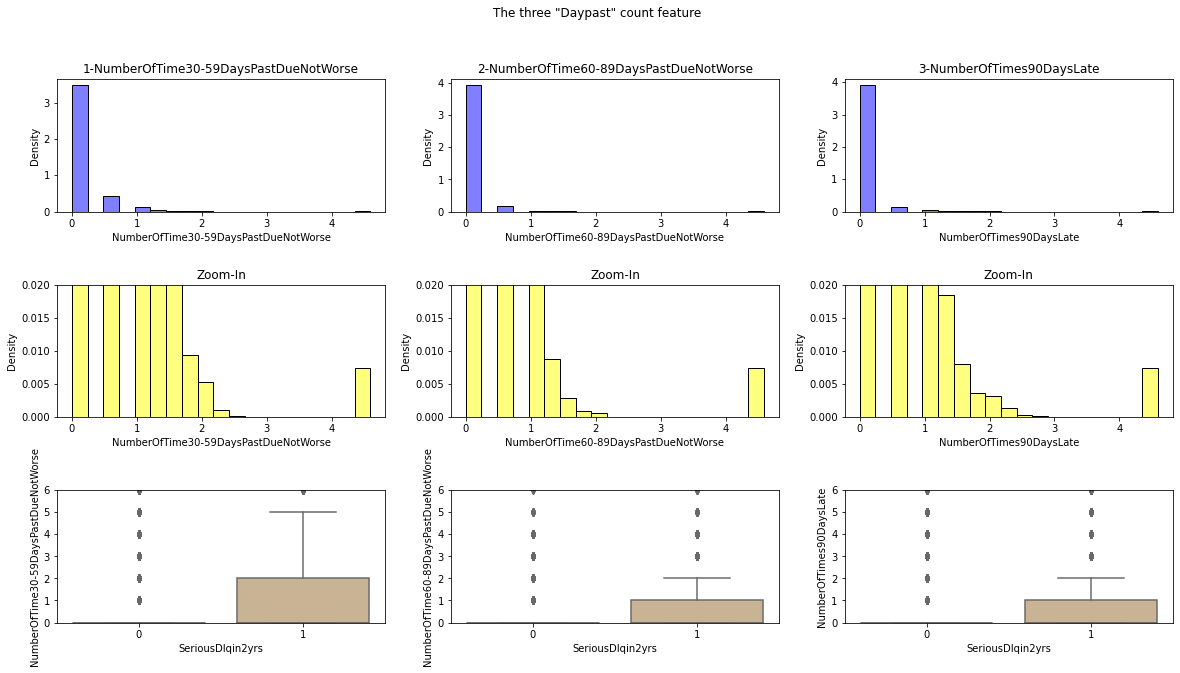

In [450]:
fig,axes =plt.subplots(3,3,figsize=(20,10))
fig.subplots_adjust(hspace=0.55)
for i, feature in enumerate(['NumberOfTime30-59DaysPastDueNotWorse','NumberOfTime60-89DaysPastDueNotWorse','NumberOfTimes90DaysLate']):
    sns.histplot(df_train[feature].apply(np.log1p), label='Train',stat='density',color='blue',alpha=0.5,edgecolor='k',ax=axes[0][i])
    sns.histplot(df_train[feature].apply(np.log1p),label='Train',stat='density',color='yellow',alpha=0.5,edgecolor='k',ax=axes[1][i])
    sns.boxplot(x='SeriousDlqin2yrs', y=df_train[feature],data=df_train,ax=axes[2][i],palette=['tan'])
    axes[0][i].set_title('{}-{}'.format(i+1,feature))
    axes[1][i].set_title('Zoom-In')
    axes[1][i].set_ylim(0,0.02)
    axes[2][i].set_ylim(0,6)
plt.suptitle('The three "Daypast" count feature')


In [451]:
df_train[df_train['NumberOfTimes90DaysLate']>=96][['NumberOfTime30-59DaysPastDueNotWorse','NumberOfTime60-89DaysPastDueNotWorse','NumberOfTimes90DaysLate']]

,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate
1733,98,98,98
2286,98,98,98
3884,98,98,98
4417,98,98,98
4705,98,98,98
...,...,...,...
147774,98,98,98
149153,98,98,98
149239,98,98,98
149439,98,98,98


In [452]:
df_train=df_train[df_train['NumberOfTimes90DaysLate']<=96]

In [453]:
#Bin_group:
condition_due=[(df_train['NumberOfTime30-59DaysPastDueNotWorse']>=0)&(df_train['NumberOfTime30-59DaysPastDueNotWorse']<=1),
               (df_train['NumberOfTime30-59DaysPastDueNotWorse']>1)&(df_train['NumberOfTime30-59DaysPastDueNotWorse']<=2),
               (df_train['NumberOfTime30-59DaysPastDueNotWorse']>2)]
value_due=['0-1','1-2','>2']
df_train['30dayspastdue']=np.select(condition_due,value_due)
#Count frequency of 0 and 1 in each group:
duel=df_train[['30dayspastdue','SeriousDlqin2yrs']]
total_due_bin=duel.groupby(by=['30dayspastdue'],as_index=False).agg('count')
due_default=duel.groupby(by=['30dayspastdue'],as_index=False).agg('sum')
due_default_ratio=total_due_bin.merge(due_default,how='outer',on='30dayspastdue')
due_default_ratio.columns=['30dayspastdue','Total','Default']
due_default_ratio['default_rate']=due_default_ratio.eval('Default/Total*100')
due_default_ratio['non_default_rate']=due_default_ratio.eval('((Total-Default)/Total)*100')
due_default_ratio

C:\Users\Admin\AppData\Local\Temp\ipykernel_11080\3488446356.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['30dayspastdue']=np.select(condition_due,value_due)


,30dayspastdue,Total,Default,default_rate,non_default_rate
0,0-1,142051,7450,5.244595,94.755405
1,1-2,4598,1219,26.511527,73.488473
2,>2,3087,1214,39.326207,60.673793


<AxesSubplot:xlabel='30dayspastdue', ylabel='default_rate'>

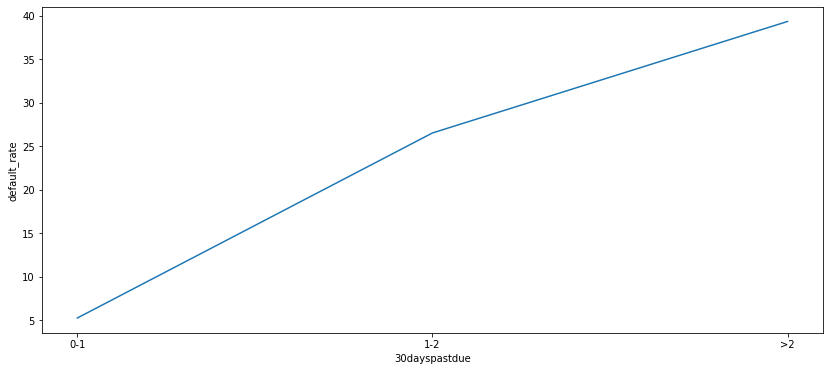

In [454]:
rcParams['figure.figsize']=14,6
sns.lineplot(data=due_default_ratio, x='30dayspastdue', y='default_rate')

b. Missing value    

In [455]:
df_train.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29611
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3893
age_group                                   0
30dayspastdue                               0
dtype: int64

The missing value for Monthlly income seems to be relatively high (~20% of the data). First we will explore the missing value of Income to see whether should we impute the mean or median into the missing value, and to see  if the person with missing Monthly Income have high rate of default

Number of dependents have 3924 missing values which equal to ~2.5% of the dataset

In [456]:
#Should we impute mean ,mode or median?? after imputing will it affect the distribution?? What is the distribution of monthly income na between output classes??
df_train['MonthlyIncome'].describe() 

count    1.201250e+05
mean     6.675192e+03
std      1.439226e+04
min      0.000000e+00
25%      3.400000e+03
50%      5.400000e+03
75%      8.250000e+03
max      3.008750e+06
Name: MonthlyIncome, dtype: float64

In [457]:
df_train['NumberOfDependents'].median()

0.0

In [458]:
df_train.fillna(df_train.median(),inplace=True)
df_train.isnull().sum()

C:\Users\Admin\AppData\Local\Temp\ipykernel_11080\3762304220.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_train.fillna(df_train.median(),inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11080\3762304220.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.fillna(df_train.median(),inplace=True)


SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
age_group                               0
30dayspastdue                           0
dtype: int64

c:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Admin\anaconda3\lib\si

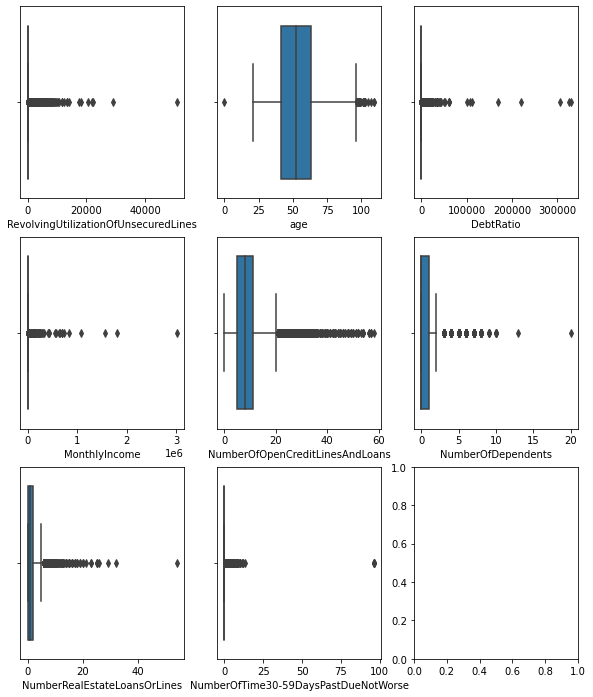

In [459]:
#Visualization of outliers
fig,axes=plt.subplots(3,3,figsize=(10,12))
for index,col in enumerate(num_f):
    x,y=index//3,index%3
    sns.boxplot(df_train[col],ax=axes[x,y])

In [460]:
def outliers(df,column):
    #first quartile/percentile
    first_qrt=np.quantile(df[column],0.25)
    #third quartile/percentile
    third_qrt=np.quantile(df[column],0.75)
    lower_whisker=first_qrt-(third_qrt-first_qrt)*1.5
    upper_whisker=third_qrt+(third_qrt-first_qrt)*1.5
    df_lower_outliers=df.loc[df[column]<lower_whisker]
    df_upper_outliers=df.loc[df[column]>upper_whisker]
    print(column,':',len(df_lower_outliers),'-',len(df_upper_outliers))


In [461]:
for col in num_f:
    outliers(df_train,col)

RevolvingUtilizationOfUnsecuredLines : 0 - 769
age : 1 - 45
DebtRatio : 0 - 31279
MonthlyIncome : 0 - 9169
NumberOfOpenCreditLinesAndLoans : 0 - 3980
NumberOfDependents : 0 - 13329
NumberRealEstateLoansOrLines : 0 - 793
NumberOfTime30-59DaysPastDueNotWorse : 0 - 23718


there are insanely amount of outliers in some features such as Monthly Income, Debt Ratio, Revolving utilization, Number of x day past due,number of loans.

In [462]:
def detect_outliers(df,column):
#first quartile/percentile
    first_qrt=np.quantile(df[column],0.25)
    #third quartile/percentile
    third_qrt=np.quantile(df[column],0.75)
    lower_whisker=first_qrt-(third_qrt-first_qrt)*1.5
    upper_whisker=third_qrt+(third_qrt-first_qrt)*1.5
    df_lower_outliers=df.loc[df[column]<lower_whisker]
    df_upper_outliers=df.loc[df[column]>upper_whisker]
    outlier=df_train.loc[(df_train[col]<lower_whisker)|(df_train[col]>upper_whisker)]
    print('Number of outliers:', len(outlier))
    print('% outliers: ',len(outlier)*100/len(df_train),'% \n',)

In [463]:
for col in num_f:
    print(col,':')
    detect_outliers(df_train,col)

RevolvingUtilizationOfUnsecuredLines :
Number of outliers: 769
% outliers:  0.5135705508361382 % 

age :
Number of outliers: 46
% outliers:  0.030720735160549233 % 

DebtRatio :
Number of outliers: 31279
% outliers:  20.88943206710477 % 

MonthlyIncome :
Number of outliers: 9169
% outliers:  6.1234439279799115 % 

NumberOfOpenCreditLinesAndLoans :
Number of outliers: 3980
% outliers:  2.6580114334562164 % 

NumberOfDependents :
Number of outliers: 13329
% outliers:  8.901666933803494 % 

NumberRealEstateLoansOrLines :
Number of outliers: 793
% outliers:  0.5295987604851204 % 

NumberOfTime30-59DaysPastDueNotWorse :
Number of outliers: 23718
% outliers:  15.839878185606668 % 



there are insanely amount of outliers in some features such as Monthly Income, Debt Ratio, Revolving utilization, Number of x day past due,number of loans.

In [464]:
import scipy
df_train['age']=scipy.stats.mstats.winsorize(df_train['age'],limits=[0.0001,0.01])
df_train['NumberRealEstateLoansOrLines']=scipy.stats.mstats.winsorize(df_train['NumberRealEstateLoansOrLines'],limits=[0,0.0053])
df_train['NumberOfDependents']=scipy.stats.mstats.winsorize(df_train['NumberOfDependents'],limits=[0,0.089])
df_train['MonthlyIncome']=scipy.stats.mstats.winsorize(df_train['MonthlyIncome'],limits=[0,0.22])
df_train['DebtRatio']=scipy.stats.mstats.winsorize(df_train['DebtRatio'],limits=[0,0.21])
df_train['RevolvingUtilizationOfUnsecuredLines']=scipy.stats.mstats.winsorize(df_train['RevolvingUtilizationOfUnsecuredLines'],limits=[0,0.0051])
df_train['NumberOfOpenCreditLinesAndLoans']=scipy.stats.mstats.winsorize(df_train['NumberOfOpenCreditLinesAndLoans'],limits=[0,0.027])


                                                                                                                                       

C:\Users\Admin\AppData\Local\Temp\ipykernel_11080\3437823100.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['age']=scipy.stats.mstats.winsorize(df_train['age'],limits=[0.0001,0.01])
C:\Users\Admin\AppData\Local\Temp\ipykernel_11080\3437823100.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['NumberRealEstateLoansOrLines']=scipy.stats.mstats.winsorize(df_train['NumberRealEstateLoansOrLines'],limits=[0,0.0053])
C:\Users\Admin\AppData\Local\Temp\ipykernel_11080\3437823100.py:4: Settin

c:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Admin\anaconda3\lib\si

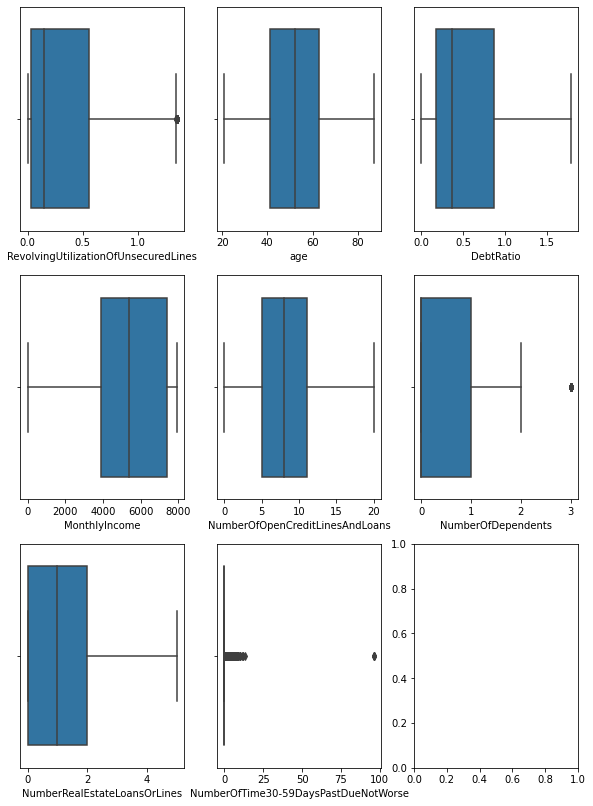

In [465]:
fid, axes=plt.subplots(3,3,figsize=(10,14))
for index,col in enumerate(num_f):
    x,y=index//3,index%3
    sns.boxplot(df_train[col],ax=axes[x,y])
    

In [466]:
df_train['NumberOfDependents'].median() #Vẽ boxplot của numberofdependents theo biến target


0.0

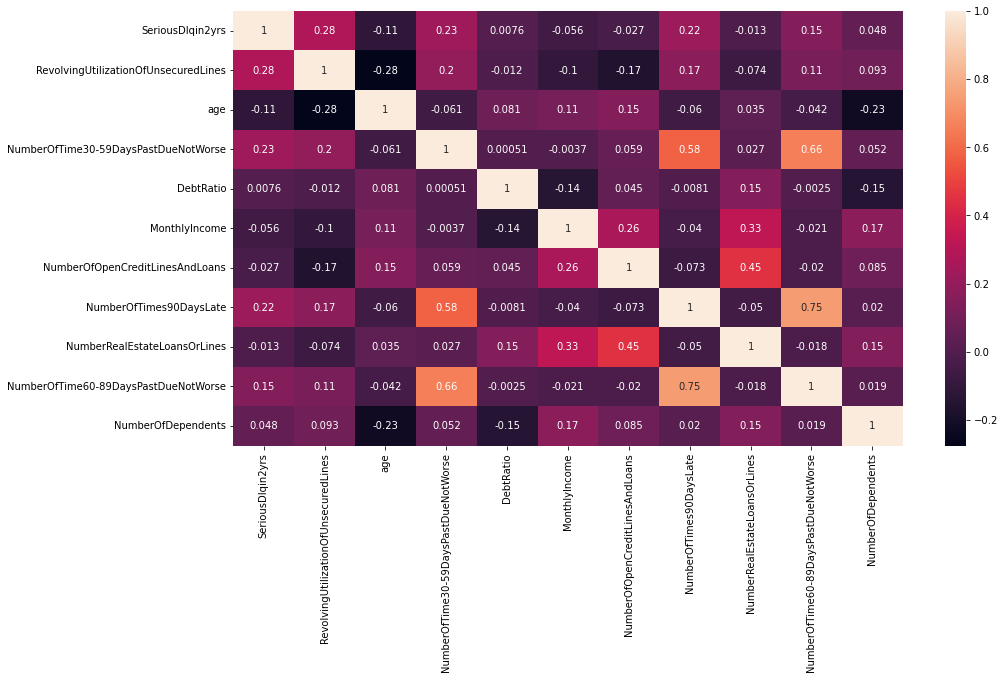

In [467]:
Correl_matrix=df_train.corr()
plt.figure(figsize=(15,8))
sns.heatmap(Correl_matrix,annot=True)
plt.show()


Base on the  data exploratory, we can conclude that this data below is important and relevant to the outcome of this model without making it overfit or underfit:
- Revolving Utilization
- Age
- Debt Ratio 
- Monthly income 
- Number of 30-59 days delinquecy
As we can see from the correlation matrix, The relevant between 3 number of xx days delinquecy is highly correlated with the correlations coefficient ~0.99 thus I dropped 2 columns and keep only 30-59 day of delinquecy.


In [468]:
df_cleanned=df_train.drop(columns=['NumberOfTime60-89DaysPastDueNotWorse','NumberOfTimes90DaysLate','age_group','30dayspastdue','NumberOfDependents']).copy()
df_cleanned

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines
0,1,0.766127,45,2,0.802982,7916.0,13,5
1,0,0.957151,40,0,0.121876,2600.0,4,0
2,0,0.658180,38,1,0.085113,3042.0,2,0
3,0,0.233810,30,0,0.036050,3300.0,5,0
4,0,0.907239,49,1,0.024926,7916.0,7,1
...,...,...,...,...,...,...,...,...
149995,0,0.040674,74,0,0.225131,2100.0,4,1
149996,0,0.299745,44,0,0.716562,5584.0,4,1
149997,0,0.246044,58,0,1.780311,5400.0,18,1
149998,0,0.000000,30,0,0.000000,5716.0,4,0


e. Oversampling


In [469]:
good=df_cleanned.SeriousDlqin2yrs.value_counts()[0]
bad=df_cleanned.SeriousDlqin2yrs.value_counts()[1]
numberbad=bad/(good+bad)*100
print('The number of good behavior is: ',good)
print('The number of bad behavior is: ',bad)
print('The percentage of bad customer on this dataset is: ',numberbad,'%')



The number of good behavior is:  139853
The number of bad behavior is:  9883
The percentage of bad customer on this dataset is:  6.6002831650371325 %


The imbalanced dataset may affect the outcome of the model as it can bias foward the majority-The good behavior.It might have a good  accuracy rate, as it predicts the good behavior exactly, but when it comes to our target of classigying bad credit rate, it will not perform as its best since it keeps predict that everyone is good

To handle this problem, I us Resampling technique. Because my dataset is large nearly 150,000 observations, so I use over-sampling technique which is to select the minority of this dataset and then duplicate them.

In [470]:
from sklearn.model_selection import train_test_split
X=df_cleanned.drop('SeriousDlqin2yrs',axis=1).copy() 
y=df_cleanned.SeriousDlqin2yrs
X_train_i,X_test_i,y_train_i,y_test_i=train_test_split(X,y,test_size=0.3,random_state=0)

In [471]:
from imblearn.over_sampling import SMOTE
oversample=SMOTE()
X=np.array(X)
X,y=oversample.fit_resample(X, y)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
print('Number X_train dataset: ', X_train.shape)
print('Number y_train dataset: ', y_train.shape)
print('Number X_test dataset: ', X_test.shape)
print('Number y_test dataset: ', y_test.shape)

Number X_train dataset:  (195794, 7)
Number y_train dataset:  (195794,)
Number X_test dataset:  (83912, 7)
Number y_test dataset:  (83912,)


In [472]:
sm=SMOTE(random_state=2)
X_train_res,y_train_res=sm.fit_resample(X_train,y_train.ravel())

In [473]:
print("Before Oversampling, counts of label'1': {}".format(sum(y_train_i==1)))
print("Before Oversampling, counts of label'0': {}".format(sum(y_train_i==0)))

print("After Oversampling, the shape of train_X: {}".format(X_train_res.shape))
print("After Oversampling, the shape of train_y: {}\n".format(y_train_res.shape))

print("After Oversampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After Oversampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before Oversampling, counts of label'1': 6845
Before Oversampling, counts of label'0': 97970
After Oversampling, the shape of train_X: (195806, 7)
After Oversampling, the shape of train_y: (195806,)

After Oversampling, counts of label '1': 97903
After Oversampling, counts of label '0': 97903


III.Modeling

1.Logistic Regression

2.Random Forest

3 Gradient Boosting



1. Logistic Regression

Logistic Regression with class_weight= balanced to reduce the  imbalance dataset effect 

In [474]:
#Original dataset:
X1= df_cleanned.drop('SeriousDlqin2yrs',axis=1).copy()
y1=df_cleanned.SeriousDlqin2yrs
X1.shape,y1.shape
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.3, random_state=0)


In [475]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x1_train=sc.fit_transform(X1_train)
x1_test=sc.transform(X1_test)


In [488]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,classification_report,roc_curve
model_1=LogisticRegression(random_state=42,solver='saga',penalty='l1',class_weight='balanced',C=1000, max_iter=1000)
model_1.fit(x1_train, y1_train)
y_scores_probal=model_1.predict_proba(X1_train)
y_scores1=y_scores_probal[:,1]
print("Accuracy Score: {}".format(accuracy_score(y1_test,model_1.predict(x1_test))))
print("AUC Score: {}".format(roc_auc_score(y1_train,y_scores1)))
print('LR using Original dataset classification report: \n',classification_report(y1_test,model_1.predict(x1_test)))

Accuracy Score: 0.7619376238284989
AUC Score: 0.5536897887600393
LR using Original dataset classification report: 
               precision    recall  f1-score   support

           0       0.98      0.76      0.86     41883
           1       0.19      0.75      0.30      3038

    accuracy                           0.76     44921
   macro avg       0.58      0.76      0.58     44921
weighted avg       0.92      0.76      0.82     44921



c:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


<AxesSubplot:>

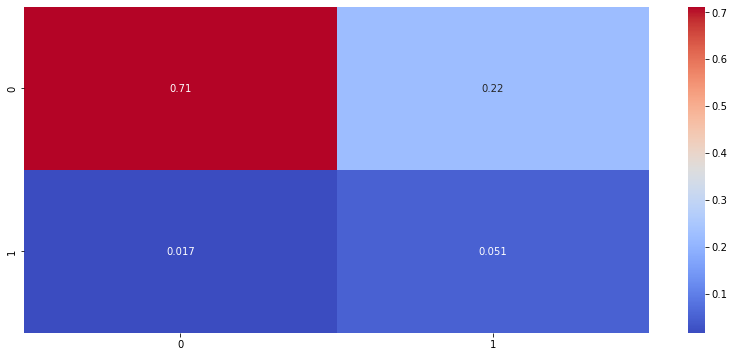

In [477]:
cm=confusion_matrix(y1_test,model_1.predict(x1_test))
sns.heatmap(cm/np.sum(cm),annot=True,cmap='coolwarm')

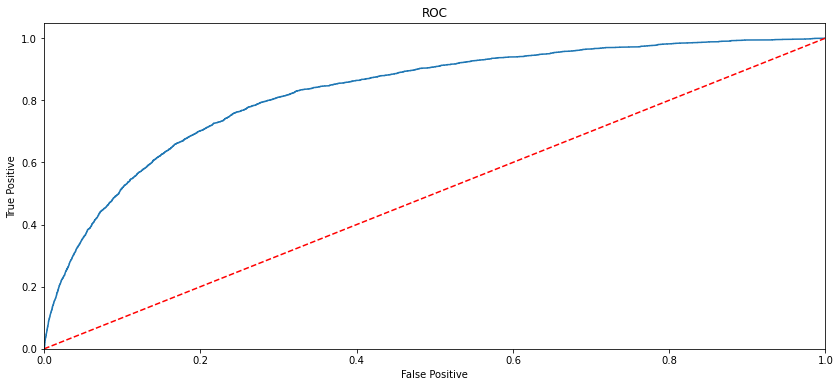

In [478]:
logit_roc_auc=roc_auc_score(y1_test,model_1.predict(x1_test))
fpr,tpr,thresholds=roc_curve(y1_test, model_1.predict_proba(x1_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area= %0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC')
plt.show()


In [489]:
#Using oversampling:
x_train=sc.fit_transform(X_train_res)
x_test=sc.transform(X_test)
model=LogisticRegression(random_state=42,solver='saga',penalty='l1',class_weight='balanced',C=1000, max_iter=1000)
model.fit(x_train,y_train_res)
print('Accuracy Score: {}'.format(accuracy_score(y_test,model.predict(x_test))))
print(" LR using oversampled dataset classification report: \n",classification_report(y_test,model.predict(x_test)))

Accuracy Score: 0.7635618266755648
 LR using oversampled dataset classification report: 
               precision    recall  f1-score   support

           0       0.76      0.77      0.76     41962
           1       0.76      0.76      0.76     41950

    accuracy                           0.76     83912
   macro avg       0.76      0.76      0.76     83912
weighted avg       0.76      0.76      0.76     83912



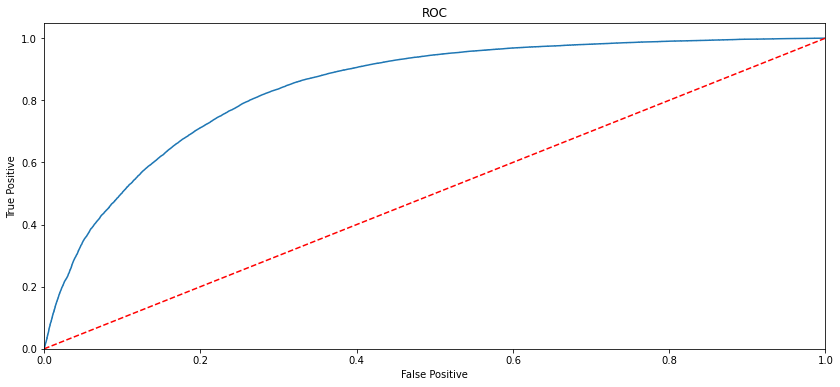

In [480]:
logit_roc_auc=roc_auc_score(y_test,model.predict(x_test))   
fpr,tpr,thresholds=roc_curve(y_test,model.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area= %0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC')
plt.show()

In [487]:
from sklearn.ensemble import GradientBoostingClassifier
gbc_model=GradientBoostingClassifier(n_estimators=200,learning_rate=0.05,max_depth=4,random_state=42)
gbc_model.fit(x_train,y_train_res)
gbc_proba=gbc_model.predict_proba(X1_train)
gbc_score=gbc_proba[:,1]
accuracy_score(y_test,gbc_model.predict(x_test))
print(classification_report(y_test,gbc_model.predict(x_test)))

c:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.89      0.94      0.92     41962
           1       0.94      0.88      0.91     41950

    accuracy                           0.91     83912
   macro avg       0.91      0.91      0.91     83912
weighted avg       0.91      0.91      0.91     83912



In [485]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(random_state=42,n_estimators=300,max_depth=5,class_weight='balanced')
forest.fit(x_train,y_train_res)
print('Accuracy Score: {}'.format(accuracy_score(y_test,forest.predict(x_test))))
print("Classification report: \n",classification_report(y_test,forest.predict(x_test)))

Accuracy Score: 0.8335160644484698
Classification report: 
               precision    recall  f1-score   support

           0       0.84      0.83      0.83     41962
           1       0.83      0.84      0.83     41950

    accuracy                           0.83     83912
   macro avg       0.83      0.83      0.83     83912
weighted avg       0.83      0.83      0.83     83912

